In [85]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

dataPath = "aqmaps/results/normal-data/data.csv"

data = pd.read_csv(dataPath)

display(data.head(2))
data["returnsClose"] = data["returnsClose"].astype(pd.Categorical(data["returnsClose"]),clone=False)
data["failed"] = data["failed"].astype(pd.Categorical(data["failed"]),clone=False)
data["pathfindingHeuristic"] = data["pathfindingHeuristic"].astype(pd.Categorical(data["pathfindingHeuristic"]),clone=False)
data["plannerType"] = data["plannerType"].astype(pd.Categorical(data["plannerType"]),clone=False)
data["distanceMatrixType"] = data["distanceMatrixType"].astype(pd.Categorical(data["distanceMatrixType"]),clone=False)


,day,month,year,moves,sensorsReached,returnsClose,time(ms),failed,failedCause,pathfindingHeuristic,plannerType,distanceMatrixType,AstarRelaxationFactor,hashingGridWidth,2optEpsilon
0,1,1,2021,88,33,True,197.073289,False,NaN,STRAIGHT_LINE,NEAREST_INSERTION,EUCLIDIAN,1.0,0.000004,0.00003
1,1,1,2021,88,33,True,48.778801,False,NaN,STRAIGHT_LINE,NEAREST_INSERTION,EUCLIDIAN,1.0,0.000004,0.00000


day                        15.751106
month                       6.352510
year                     2020.553182
moves                      91.322753
sensorsReached             33.000000
returnsClose                1.000000
time(ms)                   65.961014
failed                      0.000000
failedCause                      NaN
AstarRelaxationFactor       1.249962
hashingGridWidth            0.000004
2optEpsilon                 0.000015
dtype: float64

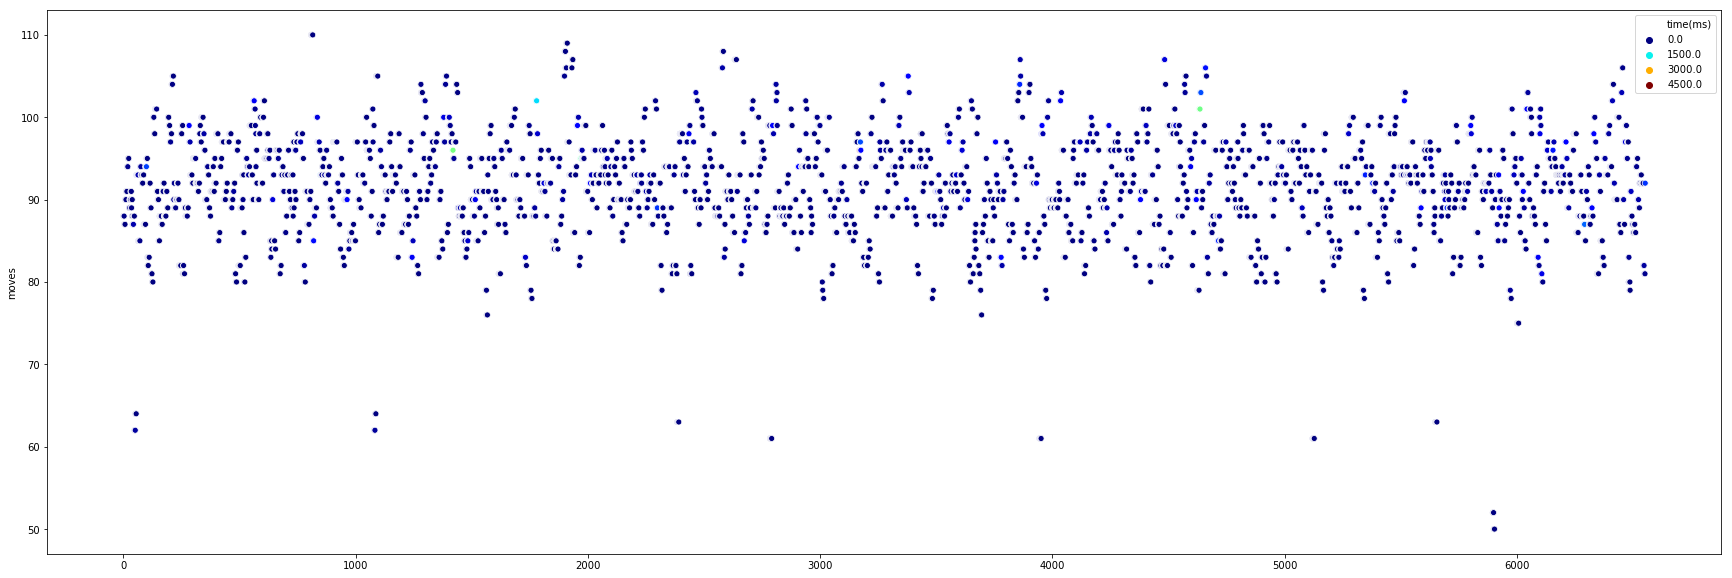

In [90]:
fig,ax = plt.subplots(1)
fig.set_size_inches(30,10)

# data = data[data.plannerType=="NEAREST_INSERTION"]
# data = data[data.distanceMatrixType=="EUCLIDIAN"]
sns.scatterplot(data=data,x=data.index,y=data.moves,hue="time(ms)",palette="jet")
data.mean(axis=0)